<a href="https://colab.research.google.com/github/Kairos1708/Se-ales_y_Sistemas/blob/main/CORRECTION_SYS_Parcial_2_Punto_1_JEMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

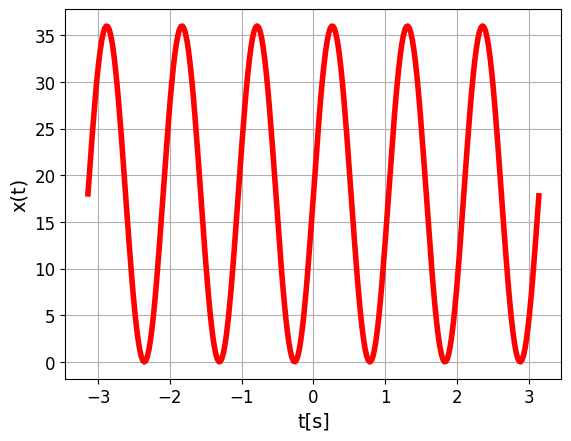

In [2]:
# Para graficar
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import warnings
warnings.filterwarnings("ignore")

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

ti = -np.pi
tf = np.pi
wo = 2*np.pi/(tf-ti) # Frecuencia angular
Fo = wo/2*np.pi # frecuencia fundamental
Fs = 30*Fo # frecuencia muestreo -> debe respetar Nyquist Fs >= 2 Fo
tv = np.arange(ti,tf,1/Fs)  #vector de tiempo más adelante se explicará porqué se manejan dichos limites de tiempo
Nm = len(tv) #numero de muestras requeridas

#se crea la señal A y -A concatenando
xo = abs((6*np.sin(3*tv + (np.pi/4)))**2)
#graficar señal original
plt.plot(tv,xo,'r',linewidth=4)
plt.grid()
plt.xlabel("t[s]",fontsize = 14)
plt.ylabel("x(t)",fontsize = 14)
plt.show()

In [3]:
N = 10 #numero armonicos
wo = 2*np.pi/(tf-ti) # frecuencia fundamental
# definir bases
phin = np.zeros((Nm,2*N+1),dtype=np.complex_)#crear matriz para guardar bases
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)#base de fourier en el intervalo de interés



In [4]:
phin.shape #tamaño matriz phin

(297, 21)

In [5]:
# graficar bases
from ipywidgets import interact,IntSlider
fig, ax = plt.subplots(1, 1,figsize=(6,3))
def pltbase(n=1):

    plt.plot(tv,np.real(phin[:,int(n+N)]),label="Re{$\phi_n$(t)}")
    plt.xlabel("t[s]",fontsize = 14)
    plt.ylabel("$\phi_n$(t)",fontsize = 14)
    plt.plot(tv,np.imag(phin[:,int(n+N)]),label="Im{$\phi_n$(t)}")
    plt.grid()
    plt.plot(tv,xo,'r',linewidth=4,label='$x(t)$')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.gcf().set_figwidth(6)
    plt.gcf().set_figheight(3)
    plt.show()
    return
interact(pltbase,n=(-N,N,1))



interactive(children=(IntSlider(value=1, description='n', max=10, min=-10), Output()), _dom_classes=('widget-i…

<function __main__.pltbase(n=1)>

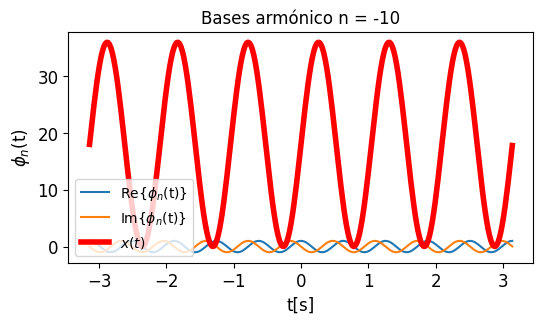

In [6]:
from matplotlib import animation, rc
from IPython.display import HTML

#figura y axes animaciónx
fig, ax = plt.subplots(1, 1,figsize=(6,3))
#función para gráfico interactivo
def update(n):
    #actualización regresor Bayesiano
    #Graficar prior
    ax.clear()
    ax.plot(tv,np.real(phin[:,int(n+N)]),label="Re{$\phi_n$(t)}")
    ax.set_xlabel("t[s]",fontsize = 12)
    ax.set_ylabel("$\phi_n$(t)",fontsize = 12)
    ax.plot(tv,np.imag(phin[:,int(n+N)]),label="Im{$\phi_n$(t)}")
    ax.plot(tv,xo,'r',linewidth=4,label='$x(t)$')
    ax.set_title(f'Bases armónico n = {n}')
    ax.legend(loc='lower left')
    plt.show()

#desplegar animación
anim = animation.FuncAnimation(fig, update, frames=np.arange(-N,N,1), blit=False)
rc('animation', html='jshtml')

- Para el cálculo $C_0$ del armónico cero, el cuál es el mismo que $b_0$ por:

$$b_0 =c_0 = \frac{1}{T}\int_\frac{\pi}{6}18+18\cdot sen\left(6t\right)dt$$

In [7]:
# Para la serie trigonométrica
# Hallamos el coeficiente bn y como es una señal impar su an es 0 y su a0 también, por tanto su Cn = bn
import numpy as np
import sympy as sp

t = sp.Symbol('t') # Se definne las variables simbólica t
n = sp.Symbol('n') # Se define la variable simbólica n
f = (3/sp.pi)*(18+18*sp.sin(6*t)) # se escribe la función, cómo la frecuencia fue modificada al simplificar la expresión, los limites de integración se deben modificar también, sinedo pi/6 y -pi/6 ya que f=6
b_0= sp.integrate(f, (t, -sp.pi/6, sp.pi/6)) # integramos f con respecto a t en os límites
print("El nivel DC o armónico b0 de la señal es:", sp.simplify(b_0))



El nivel DC o armónico b0 de la señal es: 18


- Para el cálculo $C_n$, el cuál es el mismo $C_n$. Utilizamos $\omega_o$=1:

$$b_n =c_n = \frac{2}{T}\int_\frac{\pi}{6}18+18sen\left(6t\right)\sin(n\omega_ot)dt$$

In [8]:
# El Cn para la serie trigonométrica:
import sympy as sp

t = sp.Symbol('t') # Se definne las variables simbólica t
n = sp.Symbol('n') # Se definne las variables simbólica n
f = (6/sp.pi)*((18-18*sp.sin(6*t))*(sp.sin(n*(1*t))))
b_n = sp.integrate(f, (t, -sp.pi/6, sp.pi/6))
b_n
sp.simplify(b_n)

Piecewise((18, Eq(n, -6)), (0, Eq(n, 0)), (-18, Eq(n, 6)), (1296*sin(pi*n/6)/(pi*(n**2 - 36)), True))

- Para el cálculo del $C_n$ exponencial, utillizamos la serie trigonométrica de fourier y pasamos a la exponencial con la relación:

\begin{equation}
c_n = \frac{a_n - jb_n}{2}, \quad n\neq 0\\
c_0 = b_0 \\
a_n = 0
\end{equation}


In [9]:
# Como ya se obtuvo a_n para la serie trigonométrica de fourier no es necesario hacer una integral para hallar el Cn de la serie exponencial
# Se puede hallar así: Cn = (a_n - j*b_n)/2
# Como nuestra señal no tiene parte compleja tenemos que: Cn = (b_n)/2

Cn_exp = (b_n)/2
sp.simplify(Cn_exp)

Piecewise((9, Eq(n, -6)), (0, Eq(n, 0)), (-9, Eq(n, 6)), (648*sin(pi*n/6)/(pi*(n**2 - 36)), True))

In [10]:
#calcular espectro -> cambiar según la señal estudiada
Cn = np.zeros(2*N+1,dtype=np.complex)
nv = np.linspace(-N, N, 2*N+1) #vector num armónicos
Cn[N] = 18 # nivel dc C_0
Cn[N-6] = 1j*9
Cn[N+6] = -1j*9



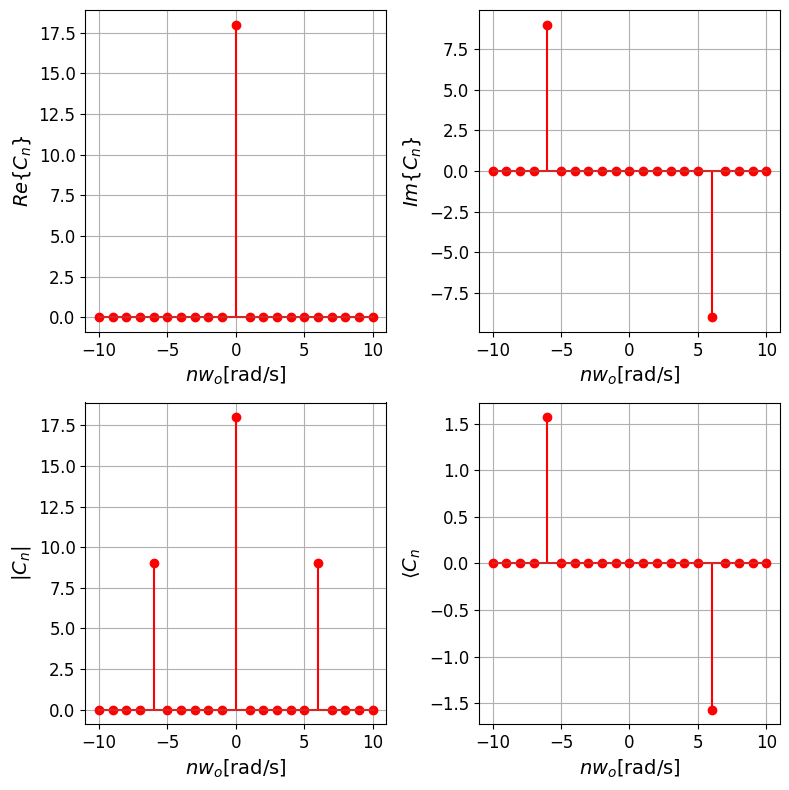

In [11]:
#graficar espectro
fig = plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.stem(nv, np.real(Cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Re\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,2)
plt.stem(nv, np.imag(Cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Im\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,3)
plt.stem(nv, abs(Cn), 'r')#magnitud del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$|C_n|$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,4)
plt.stem(nv, np.angle(Cn), 'r')#fase del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$\langle C_n$',fontsize = 14)
plt.axis('tight')
plt.grid()

fig.tight_layout()

# Explicación última gráfica: Esta gráfica nos muestra la fase, se tienen dos puntos ya que la tangente de -9/0, TIENDE A MENOS INFINITO y la tangente de menos infinito es -1.57,
# y la la tangente de 0/0, TIENDE A INFINITO y la tangente de infinito es 1.57. Para el resto de casos, la tangente de 0/0 es 0

In [12]:
# Hallamos la Potencia de nuestra señal
import sympy as sp

t = sp.Symbol('t')
n = sp.Symbol('n')
f = (3/sp.pi)*(18+18*sp.sin(6*t))**2
P_e= sp.integrate(f, (t, -sp.pi/6, sp.pi/6))
P_e
sp.simplify(P_e)

486

In [13]:
Px = P_e # estimar según señal estudiada
def pltest(Na=1):
    ind = np.arange(N-Na,N+Na+1)
    er = 1- np.sum(abs(Cn[ind])**2)/Px
    #señal reconstruida
    xe = phin[:,ind].dot(Cn[ind] ) # dot calcula el producto entre vectores
    plt.plot(tv,xe,color='b',label='$x_e(t)$') # señal estimada o filtrada
    plt.plot(tv,xo,color='r',label='x(t)') #señal original
    plt.title('$E_r$=%.2f[%%]' % (100*er),fontsize=16)
    plt.xlabel('t[s]')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend()
    plt.show()

    return
interact(pltest,Na=(1,N,1))

interactive(children=(IntSlider(value=1, description='Na', max=10, min=1), Output()), _dom_classes=('widget-in…

<function __main__.pltest(Na=1)>

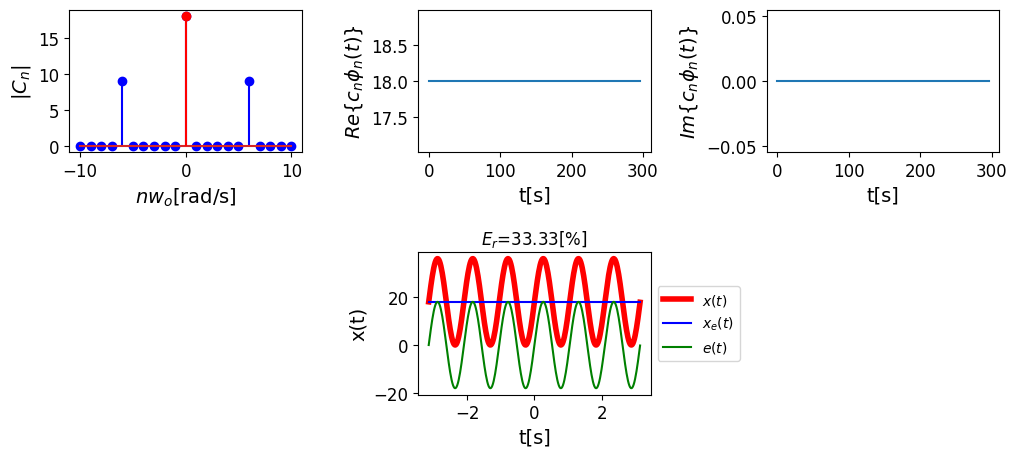

In [14]:
#figura y axes animaciónx
fig, ax = plt.subplots(2, 3,figsize=(12,5))
#función para gráfico interactivo
def update(n):
    #actualización regresor Bayesiano
    #Graficar prior
    ax[0,0].clear()
    ax[0,1].clear()
    ax[0,2].clear()
    ax[1,0].clear()
    ax[1,1].clear()
    ax[1,2].clear()

    #espectro
    ind = np.arange(N-n,N+n+1) #armónicos a considerar
    ax[0,0].stem(nv, abs(Cn), 'b')#magnitud del espectro
    ax[0,0].stem(nv[ind], abs(Cn[ind]), 'r')#magnitud del espectro
    ax[0,0].set_xlabel(r'$nw_o$[rad/s]')
    ax[0,0].set_ylabel(r'$|C_n|$')

    #componentes espectrales
    ce = phin[:,ind].dot(np.diag(Cn[ind]) )
    ax[0,1].plot(np.real(ce))#componente real
    ax[0,1].set_xlabel('t[s]')
    ax[0,1].set_ylabel('$Re\{c_n\phi_n(t)\}$')

    ax[0,2].plot(np.imag(ce))#componente imaginario
    ax[0,2].set_xlabel('t[s]')
    ax[0,2].set_ylabel('$Im\{c_n\phi_n(t)\}$')




    #reconstruccion
    er = 1- np.sum(abs(Cn[ind])**2)/Px
    #señal reconstruida
    xe = phin[:,ind].dot(Cn[ind] ) # dot calcula el producto entre vectores
    #error en t
    et = xo - xe

    ax[1,1].plot(tv,xo,'r',linewidth=4,label='$x(t)$')
    ax[1,1].plot(tv,xe,color='b',label='$x_e(t)$') # señal estimada o filtrada
    ax[1,1].plot(tv,et,color='g',label='$e(t)$') # señal estimada o filtrada
    ax[1,1].set_title('$E_r$=%.2f[%%]' % (100*er))
    ax[1,1].set_xlabel('t[s]')
    ax[1,1].set_ylabel('x(t)')
    ax[1,1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax[1,0].axis('off')
    ax[1,2].axis('off')
    plt.subplots_adjust(wspace=0.5,hspace=0.7)
    plt.show()

#desplegar animación
anim = animation.FuncAnimation(fig, update, frames=np.arange(0,N+1,1), blit=False)
rc('animation', html='jshtml')